In [192]:
# Packages needed
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

In [193]:
df = pd.read_csv('QQQ.csv')
df.head()

,Unnamed: 0,change,changeOverTime,changePercent,close,date,high,label,low,open,uClose,uHigh,uLow,uOpen,uVolume,volume
0,0,0.00,0.000000,0.0000,25.45,2003-04-01,25.67,"Apr 1, 03",25.25,25.44,25.45,25.67,25.25,25.44,73500900,73500900
1,1,0.91,0.035756,3.5756,26.36,2003-04-02,26.56,"Apr 2, 03",26.03,26.06,26.36,26.56,26.03,26.06,75989500,75989500
2,2,0.12,0.040472,0.4552,26.48,2003-04-03,26.85,"Apr 3, 03",26.31,26.64,26.48,26.85,26.31,26.64,71132900,71132900
3,3,-0.43,0.023576,-1.6239,26.05,2003-04-04,26.60,"Apr 4, 03",25.16,26.57,26.05,26.60,25.16,26.57,65756700,65756700
4,4,0.04,0.025147,0.1536,26.09,2003-04-07,27.20,"Apr 7, 03",26.07,27.11,26.09,27.20,26.07,27.11,83899400,83899400


In [194]:
df = df.rename(index=str, columns={"close": "Close", "high": "High","low":"Low","open":"Open","volume":"Volume"})
df.head()

,Unnamed: 0,change,changeOverTime,changePercent,Close,date,High,label,Low,Open,uClose,uHigh,uLow,uOpen,uVolume,Volume
0,0,0.00,0.000000,0.0000,25.45,2003-04-01,25.67,"Apr 1, 03",25.25,25.44,25.45,25.67,25.25,25.44,73500900,73500900
1,1,0.91,0.035756,3.5756,26.36,2003-04-02,26.56,"Apr 2, 03",26.03,26.06,26.36,26.56,26.03,26.06,75989500,75989500
2,2,0.12,0.040472,0.4552,26.48,2003-04-03,26.85,"Apr 3, 03",26.31,26.64,26.48,26.85,26.31,26.64,71132900,71132900
3,3,-0.43,0.023576,-1.6239,26.05,2003-04-04,26.60,"Apr 4, 03",25.16,26.57,26.05,26.60,25.16,26.57,65756700,65756700
4,4,0.04,0.025147,0.1536,26.09,2003-04-07,27.20,"Apr 7, 03",26.07,27.11,26.09,27.20,26.07,27.11,83899400,83899400


In [195]:
#df.drop(['changeOverTime','changePercent','label','uClose','uHigh','uLow','uOpen','uVolume'],axis=1, inplace=True)
df.drop(['Unnamed: 0','change','changeOverTime','changePercent','label','uClose','uHigh','uLow','uOpen','uVolume'],axis=1, inplace=True)

In [196]:
df.shape
# replace all zero values with Nan
df.replace(0,np.nan,inplace=True)
#drop all nan 
df.dropna(how='any',inplace=True) 
df.shape

(4098, 6)

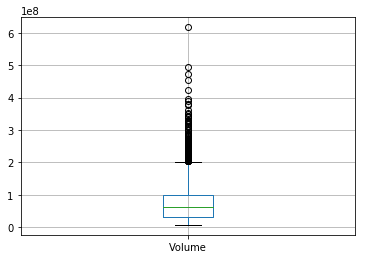

In [197]:
boxplot = df.boxplot(column=['Volume'])

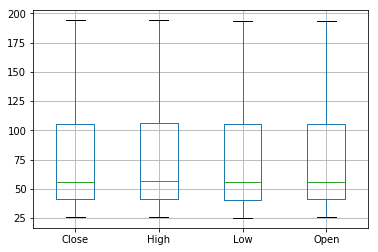

In [198]:
boxplot = df.boxplot(column=['Close', 'High', 'Low','Open'])

In [199]:
df = df.set_index('date')
df.head()
#dat.dropna(how='any')    #to drop if any value in the row has a nan

,Close,High,Low,Open,Volume
date,,,,,
2003-04-01,25.45,25.67,25.25,25.44,73500900.0
2003-04-02,26.36,26.56,26.03,26.06,75989500.0
2003-04-03,26.48,26.85,26.31,26.64,71132900.0
2003-04-04,26.05,26.60,25.16,26.57,65756700.0
2003-04-07,26.09,27.20,26.07,27.11,83899400.0


In [200]:
df['Close_Shift1'] = df['Close'].shift(1, axis=0)
df['Vol_Shift1'] = df['Volume'].shift(1, axis=0)
df.head()

,Close,High,Low,Open,Volume,Close_Shift1,Vol_Shift1
date,,,,,,,
2003-04-01,25.45,25.67,25.25,25.44,73500900.0,NaN,NaN
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,25.45,73500900.0
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,26.36,75989500.0
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,26.48,71132900.0
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,26.05,65756700.0


In [201]:
# calculate price change as compared to previous day and normalize it
df['PriceDelta'] = (df['Close']-df['Close_Shift1'])/df['Close_Shift1']
# calculate vol change as compared to previous day and normalize it
df['VolDelta'] = (df['Volume']-df['Vol_Shift1'])/df['Vol_Shift1']
df.head()

,Close,High,Low,Open,Volume,Close_Shift1,Vol_Shift1,PriceDelta,VolDelta
date,,,,,,,,,
2003-04-01,25.45,25.67,25.25,25.44,73500900.0,NaN,NaN,NaN,NaN
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,25.45,73500900.0,0.035756,0.033858
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,26.36,75989500.0,0.004552,-0.063911
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,26.48,71132900.0,-0.016239,-0.075580
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,26.05,65756700.0,0.001536,0.275906


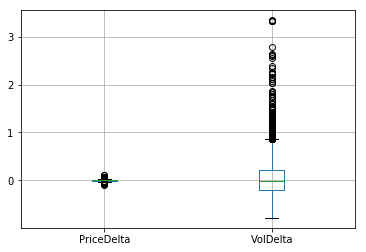

In [202]:
boxplot = df.boxplot(column=['PriceDelta', 'VolDelta'])

In [203]:
df['PriceDelta_Shift'] = df['PriceDelta'].shift(-1, axis=0)

def classLabeler(x):
    if x > 0.0 : 
        x = 1 
    else:
        x = 0
    return x

df['Labels'] = df['PriceDelta_Shift'].apply(classLabeler)
df.head(10)

,Close,High,Low,Open,Volume,Close_Shift1,Vol_Shift1,PriceDelta,VolDelta,PriceDelta_Shift,Labels
date,,,,,,,,,,,
2003-04-01,25.45,25.67,25.25,25.44,73500900.0,NaN,NaN,NaN,NaN,0.035756,1
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,25.45,73500900.0,0.035756,0.033858,0.004552,1
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,26.36,75989500.0,0.004552,-0.063911,-0.016239,0
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,26.48,71132900.0,-0.016239,-0.075580,0.001536,1
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,26.05,65756700.0,0.001536,0.275906,-0.001150,0
2003-04-08,26.06,26.29,25.88,26.15,54286100.0,26.09,83899400.0,-0.001150,-0.352962,-0.023024,0
2003-04-09,25.46,26.62,25.41,26.10,76557800.0,26.06,54286100.0,-0.023024,0.410265,0.012176,1
2003-04-10,25.77,25.77,25.30,25.46,57254700.0,25.46,76557800.0,0.012176,-0.252138,-0.010089,0
2003-04-11,25.51,26.17,25.36,26.02,67995900.0,25.77,57254700.0,-0.010089,0.187604,0.020384,1


In [204]:
df.dropna(how='any', inplace = True)
df.head(10)
# May have a better way to do this
# Change to Positive - Buy
# Change to Negative - Sell
# Count the number of changes (transactions)
# Need to balance

,Close,High,Low,Open,Volume,Close_Shift1,Vol_Shift1,PriceDelta,VolDelta,PriceDelta_Shift,Labels
date,,,,,,,,,,,
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,25.45,73500900.0,0.035756,0.033858,0.004552,1
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,26.36,75989500.0,0.004552,-0.063911,-0.016239,0
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,26.48,71132900.0,-0.016239,-0.075580,0.001536,1
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,26.05,65756700.0,0.001536,0.275906,-0.001150,0
2003-04-08,26.06,26.29,25.88,26.15,54286100.0,26.09,83899400.0,-0.001150,-0.352962,-0.023024,0
2003-04-09,25.46,26.62,25.41,26.10,76557800.0,26.06,54286100.0,-0.023024,0.410265,0.012176,1
2003-04-10,25.77,25.77,25.30,25.46,57254700.0,25.46,76557800.0,0.012176,-0.252138,-0.010089,0
2003-04-11,25.51,26.17,25.36,26.02,67995900.0,25.77,57254700.0,-0.010089,0.187604,0.020384,1
2003-04-14,26.03,26.14,25.49,25.60,53429000.0,25.51,67995900.0,0.020384,-0.214232,0.009604,1


In [205]:
# BuyAndHold
print("Buy and Hold: {0}".format(df['PriceDelta'].sum()))

Buy and Hold: 2.3552133090261114


In [206]:
# Best Possible Return
def positiveReturn(x):
    if x > 0.0 :
        return x
    else:
        return 0.0
    
df['PositiveReturn'] = df['PriceDelta'].apply(positiveReturn)
# BuyAndHold
print("Best Possible Result: {0}".format(df['PositiveReturn'].sum()))

Best Possible Result: 19.23039640935077


In [207]:
df.head(10)

,Close,High,Low,Open,Volume,Close_Shift1,Vol_Shift1,PriceDelta,VolDelta,PriceDelta_Shift,Labels,PositiveReturn
date,,,,,,,,,,,,
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,25.45,73500900.0,0.035756,0.033858,0.004552,1,0.035756
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,26.36,75989500.0,0.004552,-0.063911,-0.016239,0,0.004552
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,26.48,71132900.0,-0.016239,-0.075580,0.001536,1,0.000000
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,26.05,65756700.0,0.001536,0.275906,-0.001150,0,0.001536
2003-04-08,26.06,26.29,25.88,26.15,54286100.0,26.09,83899400.0,-0.001150,-0.352962,-0.023024,0,0.000000
2003-04-09,25.46,26.62,25.41,26.10,76557800.0,26.06,54286100.0,-0.023024,0.410265,0.012176,1,0.000000
2003-04-10,25.77,25.77,25.30,25.46,57254700.0,25.46,76557800.0,0.012176,-0.252138,-0.010089,0,0.012176
2003-04-11,25.51,26.17,25.36,26.02,67995900.0,25.77,57254700.0,-0.010089,0.187604,0.020384,1,0.000000
2003-04-14,26.03,26.14,25.49,25.60,53429000.0,25.51,67995900.0,0.020384,-0.214232,0.009604,1,0.020384


In [208]:
# Buy if next five days the price moves are positive
def classLabel(col, labels):
    # 1: BUY, 0: SELL
    # set flag to BUY
    CLASS = 1
    numRows = col.size
    #skip the first row and last five rows
    labels[0:1] = np.nan
    labels[numRows-4:numRows]= np.nan
    for i in range(2,numRows-5):
        # BUY RULE
        if (col[i-1] < 0.0) and (CLASS == 0) and (sum(col[i:i+5])>0.01):
            CLASS = 1
            labels[i] = CLASS
        # SELL RULE
        elif (col[i-1] > 0.0) and (CLASS == 1) and (sum(col[i:i+5]) < 0.0):
            CLASS = 0
            labels[i] = CLASS
        # HOLD RULE for BUY
        elif (CLASS == 1) and (sum(col[i:i+5])>0.0):
            labels[i] = CLASS
        # HOLD RULE for SELL
        elif (CLASS == 0)and (sum(col[i:i+5]) < 0.01):
            labels[i] = CLASS
        else:
            labels[i] = CLASS
    
    return None

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2053ac88>]],
      dtype=object)

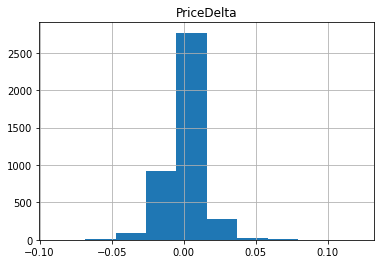

In [209]:
df.hist(column='PriceDelta')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2058e278>]],
      dtype=object)

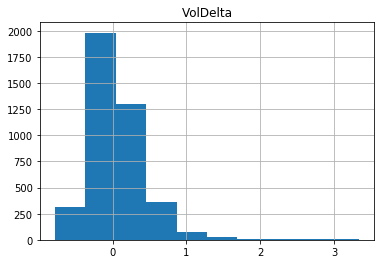

In [210]:
df.hist(column='VolDelta')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20721c18>]],
      dtype=object)

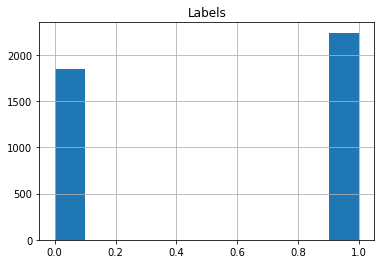

In [211]:
df.hist(column='Labels')

In [212]:
df.drop(['Close_Shift1','Vol_Shift1','PriceDelta_Shift','PositiveReturn'],axis=1, inplace=True)
df.head()

,Close,High,Low,Open,Volume,PriceDelta,VolDelta,Labels
date,,,,,,,,
2003-04-02,26.36,26.56,26.03,26.06,75989500.0,0.035756,0.033858,1
2003-04-03,26.48,26.85,26.31,26.64,71132900.0,0.004552,-0.063911,0
2003-04-04,26.05,26.60,25.16,26.57,65756700.0,-0.016239,-0.075580,1
2003-04-07,26.09,27.20,26.07,27.11,83899400.0,0.001536,0.275906,0
2003-04-08,26.06,26.29,25.88,26.15,54286100.0,-0.001150,-0.352962,0


In [213]:
df.to_csv('TrainingDataQQQ.csv')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

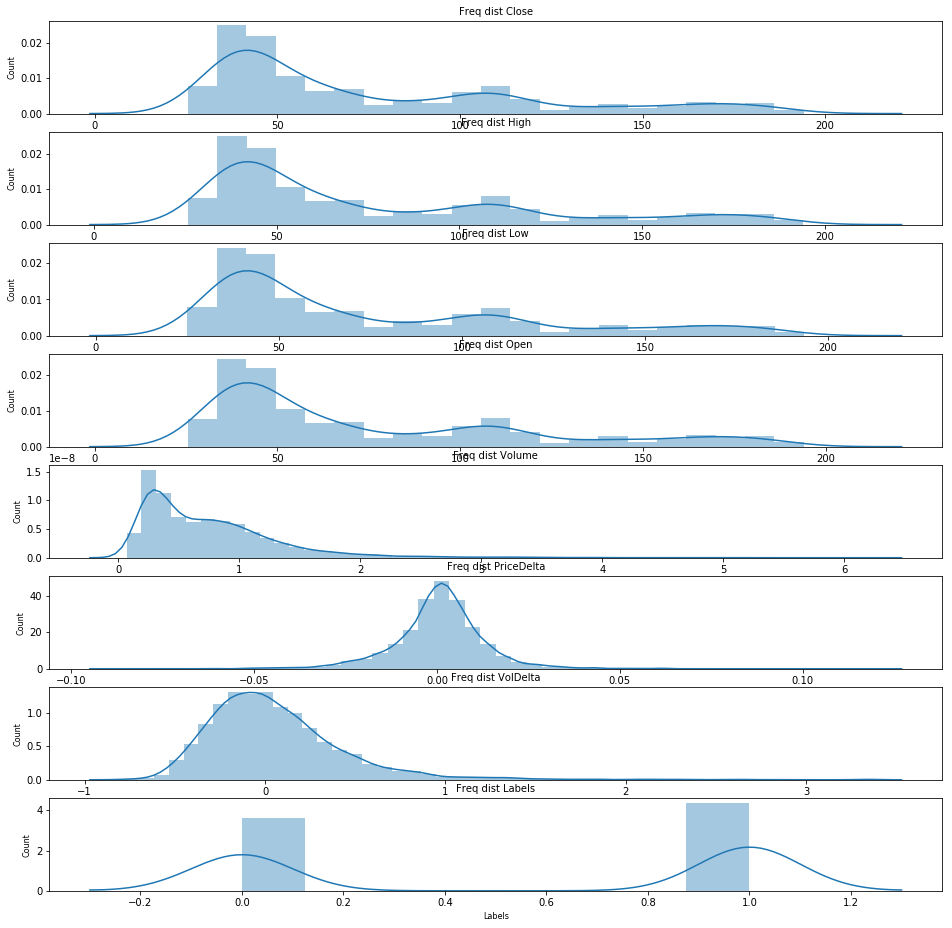

In [214]:
import seaborn as sns
col_names = ['Close','High', 'Low', 'Open', 'Volume', 'PriceDelta','VolDelta','Labels']

fig, ax = plt.subplots(len(col_names), figsize=(16,16))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [216]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['Close','High','Low','Open','Volume','PriceDelta','VolDelta']
predicted_class_names = ['Labels']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [217]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


In [218]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Labels'] == 1]), (len(df.loc[df['Labels'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Labels'] == 0]), (len(df.loc[df['Labels'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 2242 (54.74%)
Original False : 1854 (45.26%)

Training True  : 1569 (54.73%)
Training False : 1298 (45.27%)

Test True      : 673 (54.76%)
Test False     : 556 (45.24%)


## Try Bayes Classifier

In [219]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [220]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.5525


In [221]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [1 0 1 ... 1 1 1]
y_test [[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]
Accuracy: 0.5557


In [222]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[ 40 516]
 [ 30 643]]

Classification Report
             precision    recall  f1-score   support

          0       0.57      0.07      0.13       556
          1       0.55      0.96      0.70       673

avg / total       0.56      0.56      0.44      1229



## Try Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [224]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9826


In [225]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.5240


In [226]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[291 265]
 [320 353]]

Classification Report
             precision    recall  f1-score   support

          0       0.48      0.52      0.50       556
          1       0.57      0.52      0.55       673

avg / total       0.53      0.52      0.53      1229

